# Comparación de resultados obtenidos apartir de los diferentes solvers.

Importamos bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

Cargamos los dataset desde archivos csv.

In [2]:
dm=pd.read_csv('dato_matlab.csv')  #Sskiprows=1  kip row allow to skip the header row.

In [3]:
dRK=pd.read_csv('Datos_RK.csv')  #Sskiprows=1  kip row allow to skip the header row.

In [4]:
dRKDP=pd.read_csv('Datos_RKDP.csv')  #Sskiprows=1  kip row allow to skip the header row.

Extraemos los datos de posición, velocidad y tiempo de los dataset

In [5]:
#Angular position
tdm= np.array(dm.Tiempo)
pxdm= np.array(dm.P_angular)
pxdRK= np.array(dRK.P_angular)
pxdRKDP= np.array(dRKDP.P_angular)
# ANgular velocity
vxdm= np.array(dm.V_angular)
vxdRK= np.array(dRK.V_angular)
vxdRKDP= np.array(dRKDP.V_angular)


Graficamos las respuestas de posición  obtenidas a partir de diferentes solvers.

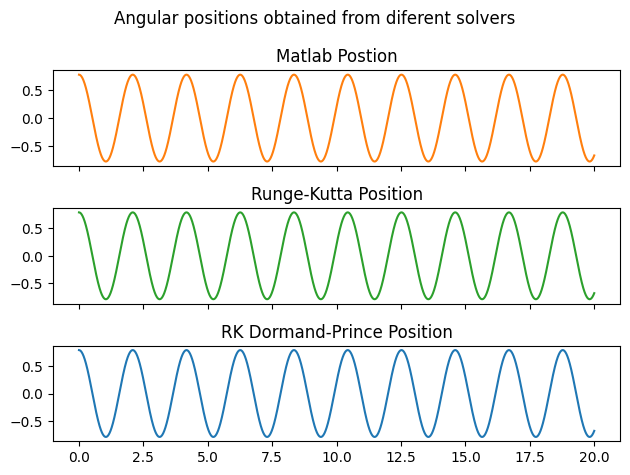

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(3,sharex=True)
fig.suptitle('Angular positions obtained from diferent solvers')
ax1.plot(tdm, pxdm,'tab:orange')
ax1.set_title("Matlab Postion")
ax2.plot(tdm, pxdRK, 'tab:green')
ax2.set_title("Runge-Kutta Position")
ax3.plot(tdm, pxdRKDP, 'tab:blue')
ax3.set_title("RK Dormand-Prince Position")
fig.tight_layout()

Graficamos las respuestas de velociddad obtenidas a partir de diferentes solvers.

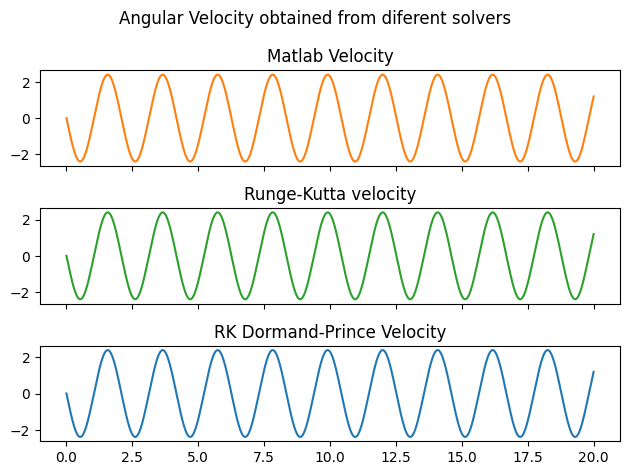

In [7]:
fig, (ax4, ax5, ax6) = plt.subplots(3,sharex=True)
fig.suptitle('Angular Velocity obtained from diferent solvers')
ax4.plot(tdm, vxdm,'tab:orange')
ax4.set_title("Matlab Velocity")
ax5.plot(tdm, vxdRK, 'tab:green')
ax5.set_title("Runge-Kutta velocity")
ax6.plot(tdm, vxdRKDP, 'tab:blue')
ax6.set_title("RK Dormand-Prince Velocity")
fig.tight_layout()

Calculamos el error porcentual al comparar las respuestas de los solver Runge Kutta y Runge Kutta Dormand Prince, respecto de los datos obtenidos con Simulink de Matlab.

In [8]:
#Percentage error angular position respecto to the simulink values
#Pe= |(va-ve)/ve|x100%
PepRK= abs((pxdRK-pxdm)/abs(pxdm))*100
PepRKDP=abs((pxdRKDP-pxdm)/abs(pxdm))*100

#Percentage error angular velocity respecto to the simulink values
VepRK= abs((vxdRK-vxdm)/abs(vxdm))*100
VepRKDP=abs((vxdRKDP-vxdm)/abs(vxdm))*100

Graficamos el error porcentual obtenido para Posición angular.

Text(0.5, 23.52222222222222, 'Tiempo (s)')

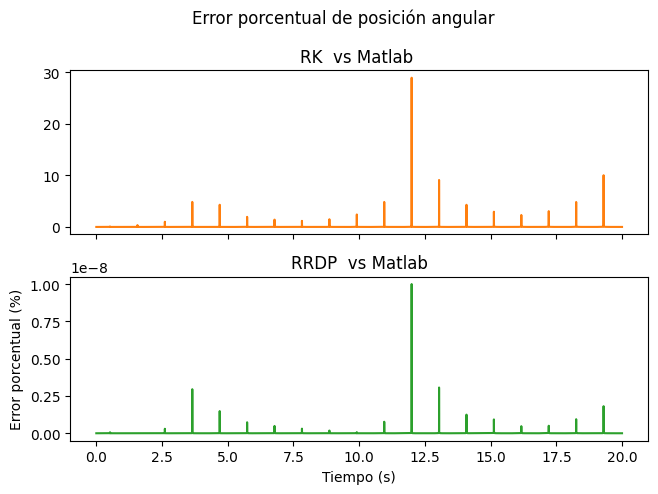

In [9]:
# Angular position percentage error plot
fig, (a1, a2) = plt.subplots(2,sharex=True)
fig.suptitle('Error porcentual de posición angular')
a1.plot(tdm, PepRK,'tab:orange')
a1.set_title("RK  vs Matlab ")
a2.plot(tdm, PepRKDP, 'tab:green')
a2.set_title("RRDP  vs Matlab")
fig.tight_layout()
plt.ylabel('Error porcentual (%)')
plt.xlabel('Tiempo (s)')

Graficamos el error porcentual para velocidad angular.

Text(0.5, 23.52222222222222, 'Tiempo (s)')

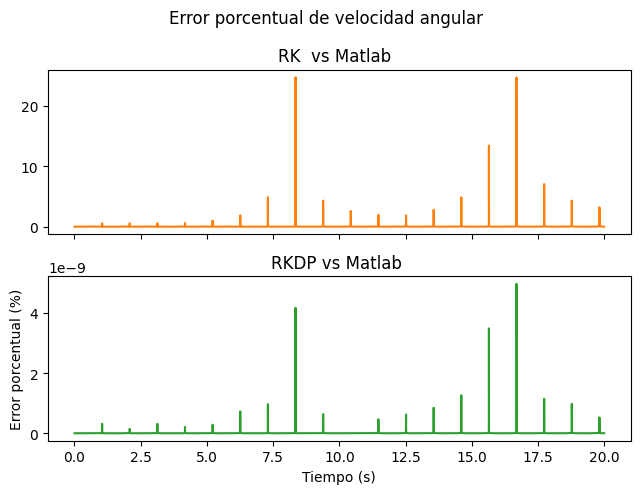

In [10]:
#Angular velocity percentage error plot
fig, (a3, a4) = plt.subplots(2,sharex=True)
fig.suptitle('Error porcentual de velocidad angular')
a3.plot(tdm, VepRK,'tab:orange')
a3.set_title("RK  vs Matlab  ")
a4.plot(tdm, VepRKDP,'tab:green')
a4.set_title("RKDP vs Matlab ")
fig.tight_layout()
plt.ylabel('Error porcentual (%)')
plt.xlabel('Tiempo (s)')

# Observaciones

Como es evidente en las imagenes, tanto para posición como para velocidad angular el solver Runge- Kutta alcanza valores en cierto punto, superiores al 20%. 
Por otro laso el solver  Runge-Kutta Dormand-Prince obtiene valores de error menores a 1e^-8.
Con esto, se observa que el solver RKDP tiene una mayor certeza sobre los valores calculados.

In [11]:
# # Angular position plot
# plt.figure()
# plt.plot(tdm, pxdm,'--', label='Theta_m')
# plt.plot(tdm, pxdRK,'-.', label='Theta_RK')
# #plt.plot(tdm, pxdRKDP,',', label='Theta_RKDP')
# plt.title('Angular positions from different solvers')
# plt.legend()
# plt.grid(True)
# plt.show()
# #Angular velocity plot
# plt.figure()
# plt.plot(tdm, vxdm, label='Omega_m')
# plt.plot(tdm, vxdRK, label='Omega_RK')
# #plt.plot(tdm, vxdRKDP, label='omega_RKDP')
# plt.title('Angular velocities from different solvers')
# plt.legend()
# plt.grid(True)
# plt.show()

# plt.figure()
# #plt.plot(tdm, PepRK,'--', label='Theta_m')
# plt.plot(tdm, PepRKDP,'-.', label='Theta_RK')
# plt.title('Angular positions perncentage error')
# plt.legend()
# plt.grid(True)
# plt.show()  

# plt.figure()
# #plt.plot(tdm, VepRK, '--',label='Omega_m')
# plt.plot(tdm, VepRKDP, label='Omega_RK')
# plt.title('Angular velocities')
# plt.legend()
# plt.grid(True)
# plt.show()